# Transfer Learning

## Import Packages

In [1]:
# !pip uninstall ml_project_util -y
# !pip install git+https://github.com/aris-gk3/ml_project_util.git
# or for local development:
# %pip uninstall ml_project_util -y
%pip install git+https://github.com/aris-gk3/ml_project_util.git

import tensorflow as tf
import os
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
# Local Packages
from ml_project_util.path import path_definition
from ml_project_util.train import train, freeze_layers, unfreeze_head, unfreeze_block
from ml_project_util.quantization_util import quant_model, quant_bw_search
from ml_project_util.quantization_util import quant_activations, quant_weights
from ml_project_util.model_evaluation import model_evaluation_precise

  Cloning https://github.com/aris-gk3/ml_project_util.git to /tmp/pip-req-build-yn731u54
  Running command git clone --filter=blob:none --quiet https://github.com/aris-gk3/ml_project_util.git /tmp/pip-req-build-yn731u54
  Resolved https://github.com/aris-gk3/ml_project_util.git to commit 62c6be5dba2d44b545daa677b6e6d9dcd247920b
  Preparing metadata (setup.py) ... done
  Created wheel for ml_project_util: filename=ml_project_util-0.1-py3-none-any.whl size=23354 sha256=2c231b9ab75c4aa2cdfed46c11ede51aff808296356ef0c62014ecbb356be201
  Stored in directory: /tmp/pip-ephem-wheel-cache-tv0zf4ff/wheels/9b/33/7a/e8e8f55a4c6aa39df26369c48b9e3497c6dde4c7663912f8ef
Successfully built ml_project_util
Note: you may need to restart the kernel to use updated packages.


2025-09-23 09:48:23.796980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758620904.155687      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758620904.254475      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Define Variable Paths

In [2]:
dict = path_definition(ds_rel_path='catsdogsconv/CatsDogs') # path_definition.config to read
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

ds_rel_path set to: catsdogsconv/CatsDogs


## Load Model for PTQ & Evaluation

In [3]:
model_name = 'CD1_P1_014_val0.0357' 
parent_name = model_name[:3]
model_path = '/kaggle/input/cd1_p1/keras/default/1/CD1_P1_014_val0.0357.keras'
# model_path = f"{PATH_SAVEDMODELS}/{parent_name}/{model_name}.keras"
model = tf.keras.models.load_model(model_path)

I0000 00:00:1758620927.594193      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758620927.594902      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


## Try PTQ & Evaluation (Evluate Correctness)

In [4]:
# quant_model(model, model_name, num_bits=8, design='sw', batch_len=157, force=0)

In [5]:
# quant_model(model, model_name, num_bits=8, design='hwa', batch_len=157, force=0)

In [6]:
# quant_model(model, model_name, num_bits=8, design='hww', batch_len=157, force=0)

In [7]:
# qw_model, acc, loss = quant_weights(model, model_name, num_bits=8, quant='symmetric', mode='eval', design='sw', batch_len=157)

In [8]:
# qw_model, acc, loss = quant_weights(model, model_name, num_bits=8, quant='symmetric', mode='eval', design='hww', batch_len=157)

In [9]:
# qw_model, acc, loss = quant_weights(model, model_name, num_bits=8, quant='symmetric', mode='eval', design='hwa', batch_len=157)

In [10]:
# quant_activations(model, model_name, num_bits=8, input_shape=(224,224,3), mode='eval', range_path='0', design='hwa', batch_len=157)

In [11]:
# quant_activations(model, model_name, num_bits=8, input_shape=(224,224,3), mode='eval', range_path='0', design='hww', batch_len=157)

In [12]:
# model_evaluation_precise(model, mode='val')
model_evaluation_precise(model, mode='test')

Found 3748 files belonging to 2 classes.
Start evaluating batches
Batch Number: 0

I0000 00:00:1758620939.174974      19 cuda_dnn.cc:529] Loaded cuDNN version 90300


Batch Number: 117
Precise test accuracy: 0.98506
Precise test loss: 0.04673


(0.9850587, 0.046727076653085675)

In [13]:
# model_name = 'CD1_P1_FT3_014_val0.0314' 
# parent_name = model_name[:3]
# model_path = '/kaggle/input/cd1_p1_search/keras/default/1/CD1_P1_FT3_014_val0.0314.keras'
# # model_path = f"{PATH_SAVEDMODELS}/{parent_name}/{model_name}.keras"
# model = tf.keras.models.load_model(model_path)

In [14]:
# model_evaluation_precise(model, mode='val')
# model_evaluation_precise(model, mode='test')

Quantizing model to 7 bits...
Saved json in: /kaggle/working/Docs_Reports/Quant/Ranges/input_range.json
Saved activation ranges in /kaggle/working/Docs_Reports/Quant/Ranges/CD1_P1_014_activation_range.json
Saved json in: /kaggle/working/Docs_Reports/Quant/Ranges/CD1_P1_014_wt_range.json
Quantization on arbitrary symmetric ranges is applied.
Read sw activation quantization range from /kaggle/working/Docs_Reports/Quant/Ranges/CD1_P1_014_activation_range.json.
New model input shape: (None, 224, 224, 3)
Found 3748 files belonging to 2 classes.
Start evaluating batches
Batch Number: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Batch Number: 117
Precise test accuracy: 0.50293
Precise test loss: 0.69091
Read weight range json from /kaggle/working/Docs_Reports/Quant/Ranges/CD1_P1_014_wt_range.json
Read activation range json from /kaggle/working/Docs_Reports/Quant/Ranges/CD1_P1_014_activation_range.json
['input_layer', 'block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'dense', 'dense_1']


Read input range json from /kaggle/working/Docs_Reports/Quant/Ranges/input_range.json
For layer 1.
For layer block1_conv1: k=10, N_i=17
Next input range: {'min': 0.0, 'max': 1070.0382080078125}
HW next input range: 1494.113945603282


For layer 2.
For layer block1_conv2: k=10, N_i=17
Next input range: {'min': 0.0, 'max': 4554.08984375}
HW next input range: 5029.367317824078


For layer 3.
For layer block2_conv1: k=8, N_i=15
Next input range: {'min': 0.0, 'max': 7481.80029

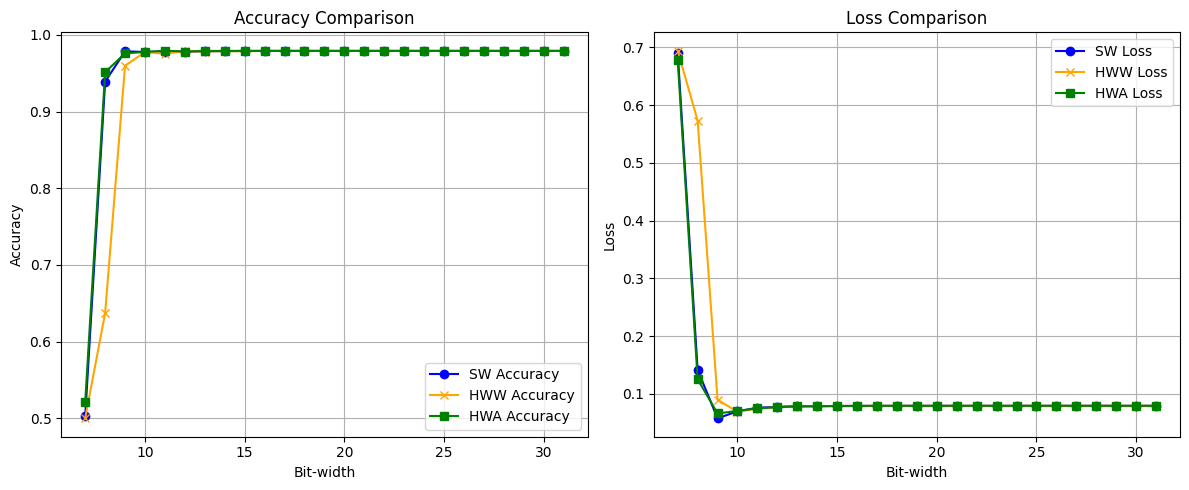

{
    "7b": {
        "accuracy": 0.5029348731040955,
        "loss": 0.690906547176927
    },
    "8b": {
        "accuracy": 0.9391675591468811,
        "loss": 0.14126339307494198
    },
    "9b": {
        "accuracy": 0.9786552786827087,
        "loss": 0.057391141921987375
    },
    "10b": {
        "accuracy": 0.97785484790802,
        "loss": 0.06962513714112097
    },
    "11b": {
        "accuracy": 0.9783884882926941,
        "loss": 0.07571214872852042
    },
    "12b": {
        "accuracy": 0.9783884882926941,
        "loss": 0.07730301888020569
    },
    "13b": {
        "accuracy": 0.9786552786827087,
        "loss": 0.07844229081014101
    },
    "14b": {
        "accuracy": 0.9789220690727234,
        "loss": 0.07838914501972254
    },
    "15b": {
        "accuracy": 0.9791889190673828,
        "loss": 0.07876407478461807
    },
    "16b": {
        "accuracy": 0.9791889190673828,
        "loss": 0.07887766062459547
    },
    "17b": {
        "accuracy": 0.979188919

In [15]:
%%time
quant_bw_search(model, model_name, range(7,32))

---